<a href="https://colab.research.google.com/github/Walidsati/AAI614_Walid_sati/blob/main/Week%203/Notebook3.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AAI614: Data Science & its Applications

*Notebook 3.2: Practice with Data Cleaning*



In [1]:
import pandas as pd
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

Exercise I. Load the following datafile from GitHub

In [2]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")

In [3]:
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


In [4]:
grads['Salary'] = grads['Salary'].str.replace('$', '').str.replace('k', '000').astype(int)
grads.head()

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,40000
1,Jerry,35,3.5,Columbia,5.0,80000
2,Elaine,55,4.0,Columbia,4.2,60000
3,Cosmo,5,2.0,City College,2.0,25000
4,Newman,25,2.8,City College,0.0,50000


Question 1: Identify all the outliers in the above data.  Justify your answers using objective measures.

In [5]:
numerical_columns = ["Avg Hours Studies per Week", "GPA", "Sense of Humour (0-5)","Salary"]

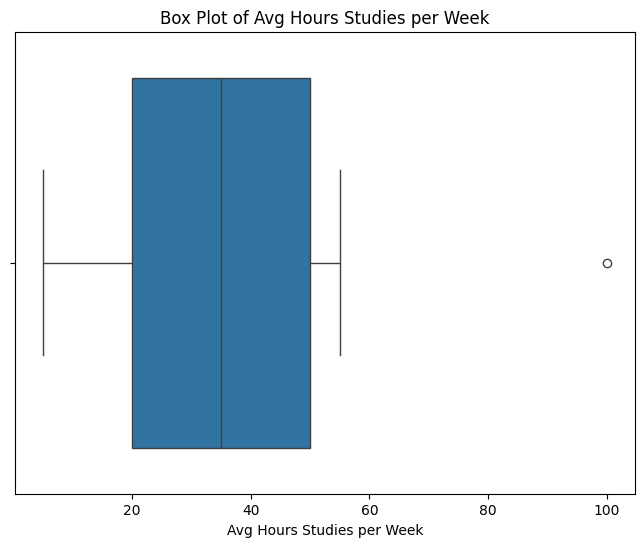

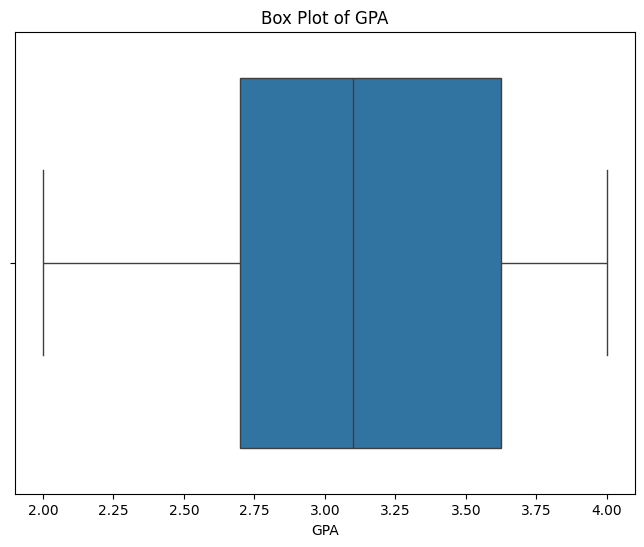

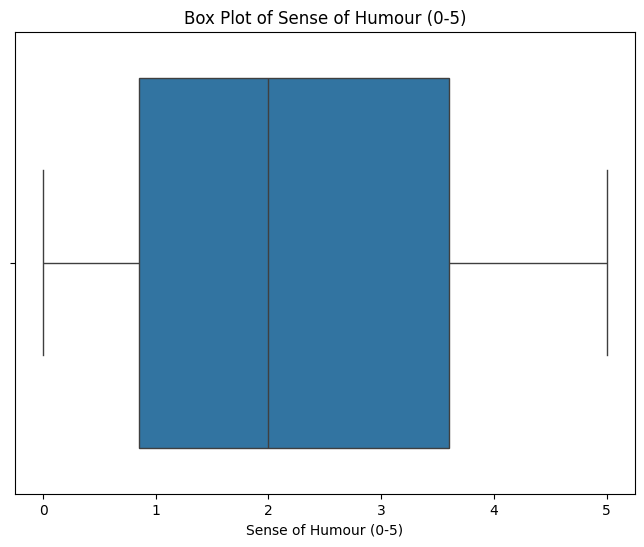

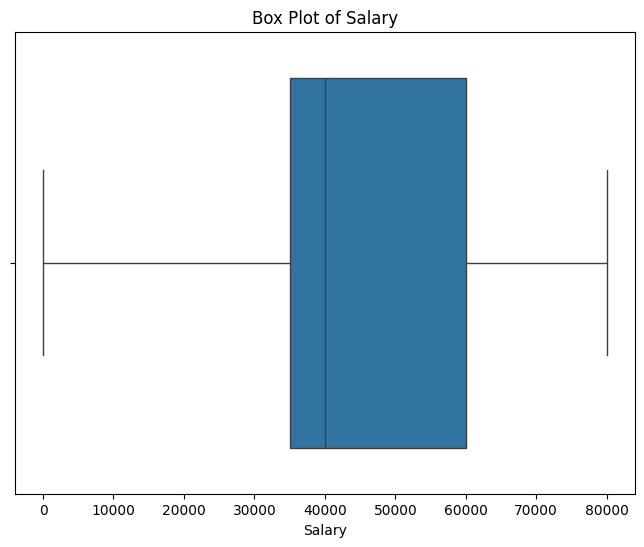

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=grads[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

In [7]:
def find_outliers_iqr(column,col):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f"For column {col}:\n    lower_bound is {lower_bound} \n    upper_bound is: {upper_bound}")
    outliers = column[(column < lower_bound) | (column > upper_bound)]
    return outliers

# Identify outliers for numerical columns
outliers = {}
numerical_columns = ["Avg Hours Studies per Week", "GPA", "Sense of Humour (0-5)","Salary"]
for col in numerical_columns:
    outliers[col] = find_outliers_iqr(grads[col],col)

# Print outliers
for col, outlier_values in outliers.items():
    print(f"Outliers in {col}:")
    print(outlier_values)
    print()

For column Avg Hours Studies per Week:
    lower_bound is -25.0 
    upper_bound is: 95.0
For column GPA:
    lower_bound is 1.3124999999999993 
    upper_bound is: 5.0125
For column Sense of Humour (0-5):
    lower_bound is -3.275 
    upper_bound is: 7.725
For column Salary:
    lower_bound is -2500.0 
    upper_bound is: 97500.0
Outliers in Avg Hours Studies per Week:
6    100
Name: Avg Hours Studies per Week, dtype: int64

Outliers in GPA:
Series([], Name: GPA, dtype: float64)

Outliers in Sense of Humour (0-5):
Series([], Name: Sense of Humour (0-5), dtype: float64)

Outliers in Salary:
Series([], Name: Salary, dtype: int64)



Question 2: There are various data that are missing.  Fill-in the missing data or delete the rows/columns that you think you should delete.  Justify your answer

In [8]:
grads.isnull().sum()

,0
Student Name,0
Avg Hours Studies per Week,0
GPA,1
University,0
Sense of Humour (0-5),2
Salary,0


In [9]:
grads = grads.dropna(subset=['Avg Hours Studies per Week', 'GPA','Sense of Humour (0-5)' , 'Salary'])

In [10]:
grads.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6 entries, 1 to 7
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student Name                6 non-null      object 
 1   Avg Hours Studies per Week  6 non-null      int64  
 2   GPA                         6 non-null      float64
 3   University                  6 non-null      object 
 4   Sense of Humour (0-5)       6 non-null      float64
 5   Salary                      6 non-null      int64  
dtypes: float64(2), int64(2), object(2)
memory usage: 336.0+ bytes


In [11]:
grads.isnull().sum()

,0
Student Name,0
Avg Hours Studies per Week,0
GPA,0
University,0
Sense of Humour (0-5),0
Salary,0


 Dropping rows with missing 'Avg Hours Studies per Week', 'GPA', and 'Salary': These are crucial for analysis, and imputation might introduce bias. Removing these rows minimizes the impact of inaccurate data on the analysis.

Question 3: Reload the data and fill-in the data using mean method as well as the frequent method.

In [12]:
grads = pd.read_csv("https://raw.githubusercontent.com/harmanani/AAI614/main/Week%203/grads.csv")
grads

,Student Name,Avg Hours Studies per Week,GPA,University,Sense of Humour (0-5),Salary
0,George,20,NaN,NYU,3.0,$40k
1,Jerry,35,3.5,Columbia,5.0,$80k
2,Elaine,55,4.0,Columbia,4.2,$60k
3,Cosmo,5,2.0,City College,2.0,$25k
4,Newman,25,2.8,City College,0.0,$50k
5,Frank,35,3.0,Festivus Uni,NaN,$40k
6,Estelle,100,3.2,Festivus Uni,1.7,$0k
7,Leo,15,2.4,Festivus Uni,0.0,$35k
8,Rachel,50,4.0,Columbia,NaN,$75k


Exercise II. Run the cell below to create a new dataframe called `df_miss`.  Its first column will contain some missing values.

In [13]:
import pandas as pd
import numpy as np
import random

nrows = 10
ncols = 5

# set a seed for random number generation
np.random.seed(314)
# create an array filled with random data
data = np.array(np.random.rand(nrows, ncols))
# put the data to a pandas dataframe
df_miss = pd.DataFrame(data)
# rename the columns
df_miss.columns = ['col_'+str(ii) for ii in range(ncols)]

# randomly set some values to missing
ix0 = np.random.randint(nrows, size=3)
ix1 = np.random.randint(nrows, size=3)

df_miss['col_0'][ix0] = np.nan
df_miss['col_1'][ix1] = np.nan

print(df_miss)

      col_0     col_1     col_2     col_3     col_4
0       NaN       NaN  0.265048  0.783205  0.918001
1  0.827355       NaN  0.260480  0.911763  0.260757
2  0.766376  0.261531  0.122291  0.386006  0.840081
3       NaN       NaN  0.633110  0.584766  0.581232
4  0.677205  0.687155  0.438927  0.320927  0.570552
5       NaN  0.861074  0.834805  0.105766  0.060408
6  0.596882  0.792395  0.226356  0.535201  0.136066
7  0.372244  0.151977  0.429822  0.792706  0.406957
8  0.177850  0.909252  0.545331  0.100497  0.718721
9  0.978429  0.309776  0.260126  0.662900  0.139720


<ipython-input-13-a77e6ba6a8cb>:21: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_miss['col_0'][ix0] = np.nan
<ipython-input-13-a77e6ba6a8cb>:22: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting 

Impute the missing values (NaN) in `col_0` (but not `col_1`) with the median.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [16]:
median_col0 = df_miss['col_0'].median()
df_miss['col_0'].fillna(median_col0, inplace=True)
df_miss

<ipython-input-16-114c5af6ad3e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_0'].fillna(median_col0, inplace=True)


,col_0,col_1,col_2,col_3,col_4
0,0.677205,NaN,0.265048,0.783205,0.918001
1,0.827355,NaN,0.260480,0.911763,0.260757
2,0.766376,0.261531,0.122291,0.386006,0.840081
3,0.677205,NaN,0.633110,0.584766,0.581232
4,0.677205,0.687155,0.438927,0.320927,0.570552
5,0.677205,0.861074,0.834805,0.105766,0.060408
6,0.596882,0.792395,0.226356,0.535201,0.136066
7,0.372244,0.151977,0.429822,0.792706,0.406957
8,0.177850,0.909252,0.545331,0.100497,0.718721
9,0.978429,0.309776,0.260126,0.662900,0.139720


Impute the missing values in `col_1` with value 0.  Store the values in the dataframe by using the parameter `inplace`.  Print the dataframe.

In [17]:
df_miss['col_1'].fillna(0, inplace=True)
df_miss

<ipython-input-17-d110ad450721>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_miss['col_1'].fillna(0, inplace=True)


,col_0,col_1,col_2,col_3,col_4
0,0.677205,0.000000,0.265048,0.783205,0.918001
1,0.827355,0.000000,0.260480,0.911763,0.260757
2,0.766376,0.261531,0.122291,0.386006,0.840081
3,0.677205,0.000000,0.633110,0.584766,0.581232
4,0.677205,0.687155,0.438927,0.320927,0.570552
5,0.677205,0.861074,0.834805,0.105766,0.060408
6,0.596882,0.792395,0.226356,0.535201,0.136066
7,0.372244,0.151977,0.429822,0.792706,0.406957
8,0.177850,0.909252,0.545331,0.100497,0.718721
9,0.978429,0.309776,0.260126,0.662900,0.139720
